In [171]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [172]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import sklearn as skl
import warnings
import statsmodels.api as sm

from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict, ShuffleSplit, validation_curve, cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelBinarizer, RobustScaler, LabelEncoder, scale, MinMaxScaler, PolynomialFeatures
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.feature_selection import RFE,SelectFromModel

from scipy.stats import skew, boxcox_normmax
from scipy.special import boxcox1p

warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter('ignore')


In [173]:
train_data = pd.read_csv("/Users/rafaelhernandez/Desktop/Machine_Learning_2/ML2_Group_Assignment/training_set_values.csv")
train_labels = pd.read_csv("/Users/rafaelhernandez/Desktop/Machine_Learning_2/ML2_Group_Assignment/training_set_labels.csv")
test_data = pd.read_csv("/Users/rafaelhernandez/Desktop/Machine_Learning_2/ML2_Group_Assignment/training_set_labels.csv"),


In [174]:
#Join Labels with Train data
train_labels = train_labels.drop(columns='id')
train_data = train_data.join(train_labels)


In [175]:
train_data.head()


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [176]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [177]:
train_data= train_data.drop(columns=['recorded_by'])

# Differentiate categorical from numerical variables, even though some are encoded already,
num_train_data = train_data[[
'id',
'amount_tsh',
'gps_height',
'num_private',
'population',
]]

other_train_data = train_data[[ 
'longitude',
'latitude',
'date_recorded',
]]
    
categorical_columns = list(set(train_data.columns) - set(num_train_data.columns) - set(other_train_data.columns))
cat_train_data = train_data.loc[:,categorical_columns]


In [178]:
train_data.head()


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [179]:
train_data_missing = train_data.isna()
train_data_missing = (train_data_missing.sum()/len(train_data))*100
train_data_missing = train_data_missing[train_data_missing!=0]
train_data_missing

funder                6.119529
installer             6.153199
subvillage            0.624579
public_meeting        5.612795
scheme_management     6.526936
scheme_name          47.417508
permit                5.144781
dtype: float64

In [180]:
column_list = cat_train_data.columns.values.tolist()
print(column_list)

['scheme_name', 'extraction_type', 'source', 'lga', 'district_code', 'source_class', 'payment', 'region_code', 'extraction_type_group', 'extraction_type_class', 'basin', 'subvillage', 'management_group', 'quality_group', 'source_type', 'scheme_management', 'public_meeting', 'funder', 'water_quality', 'waterpoint_type', 'waterpoint_type_group', 'permit', 'installer', 'construction_year', 'status_group', 'payment_type', 'quantity', 'region', 'quantity_group', 'wpt_name', 'management', 'ward']


In [181]:
def unique_values(df):
    for column_name in column_list:
        return print(df[column_name].unique())

In [182]:
for column_name in column_list:
      print(column_name,len(train_data[column_name].unique()),train_data[column_name].unique())


scheme_name 2697 ['Roman' nan 'Nyumba ya mungu pipe scheme' ... 'BL Nsherehehe'
 'Magati  gravity spri' 'Mtawanya']
extraction_type 18 ['gravity' 'submersible' 'swn 80' 'nira/tanira' 'india mark ii' 'other'
 'ksb' 'mono' 'windmill' 'afridev' 'other - rope pump' 'india mark iii'
 'other - swn 81' 'other - play pump' 'cemo' 'climax' 'walimi'
 'other - mkulima/shinyanga']
source 10 ['spring' 'rainwater harvesting' 'dam' 'machine dbh' 'other'
 'shallow well' 'river' 'hand dtw' 'lake' 'unknown']
lga 125 ['Ludewa' 'Serengeti' 'Simanjiro' 'Nanyumbu' 'Karagwe' 'Mkinga'
 'Shinyanga Rural' 'Kahama' 'Tabora Urban' 'Mkuranga' 'Namtumbo' 'Maswa'
 'Siha' 'Meatu' 'Sumbawanga Rural' 'Njombe' 'Ukerewe' 'Bariadi' 'Same'
 'Kigoma Rural' 'Moshi Rural' 'Lindi Rural' 'Rombo' 'Chamwino' 'Bagamoyo'
 'Mafia' 'Arusha Rural' 'Kyela' 'Kondoa' 'Kilolo' 'Kibondo' 'Makete'
 'Singida Rural' 'Masasi' 'Rungwe' 'Moshi Urban' 'Geita' 'Mbulu'
 'Bukoba Rural' 'Muheza' 'Lushoto' 'Meru' 'Iramba' 'Kilombero' 'Mbarali'
 'Kasul

In [183]:
#Fields that require intensive review are: installer, funder, scheme_name, ward, lga, wpt_name, subvillage
grouping_col = train_data[[
'installer',
'funder',
'scheme_name',
'ward',
'lga',
'wpt_name',
'subvillage'
]]

In [184]:
for i in grouping_col.columns:
    inspect = grouping_col[i].value_counts()/len(grouping_col)
    print(inspect.head(10))

DWE                   0.292963
Government            0.030724
RWE                   0.020303
Commu                 0.017845
DANIDA                0.017677
KKKT                  0.015118
Hesawa                0.014141
0                     0.013081
TCRS                  0.011902
Central government    0.010471
Name: installer, dtype: float64
Government Of Tanzania    0.152929
Danida                    0.052424
Hesawa                    0.037071
Rwssp                     0.023131
World Bank                0.022710
Kkkt                      0.021667
World Vision              0.020976
Unicef                    0.017795
Tasaf                     0.014764
District Council          0.014192
Name: funder, dtype: float64
K                              0.011481
None                           0.010842
Borehole                       0.009192
Chalinze wate                  0.006818
M                              0.006734
DANIDA                         0.006380
Government                     0.005387

In [185]:
train_temp = train_data.copy()
# installer - shortlist of the 5 higher and category other, note that nulls will be included in this criteria.
train_temp.installer = train_temp.installer.map(lambda x: "other" if x in ['DWE', 'Government','RWE','Commu','DANIDA'] else x )

# funder - shortlist of the 5 higher and category other, note that nulls will be included in this criteria.
train_temp.funder = train_temp.funder.map(lambda x: "other" if x in ['Government Of Tanzania',
'Danida',
'Hesawa',
'Rwssp',
'World Bank',
'Kkkt',
'World Vision',
'Unicef',
'Tasaf',
'District Council'] else x )

#Eliminate scheme_name from the dataset.
train_temp= train_temp.drop(columns=['scheme_name'])
# Eliminate ward from dataset
train_temp= train_temp.drop(columns=['ward'])
# Keep lga as is

# Eliminate wpt_name from dataset#
train_temp= train_temp.drop(columns=['wpt_name'])

# Eliminate subvillage from dataset#
train_temp= train_temp.drop(columns=['subvillage'])

#Choose Between Region and Region_Code
#train_temp= train_temp.drop(columns=['region'])
#train_temp= train_temp.drop(columns=['region_code'])

#

In [186]:
train_temp.head()


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,other,263,UNICEF,38.486161,-11.155298,0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [187]:
train_temp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 36 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
num_private              59400 non-null int64
basin                    59400 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
scheme_management        55523 non-null object
permit                   56344 non-null object
construction_year        59400 non-null int64
ex

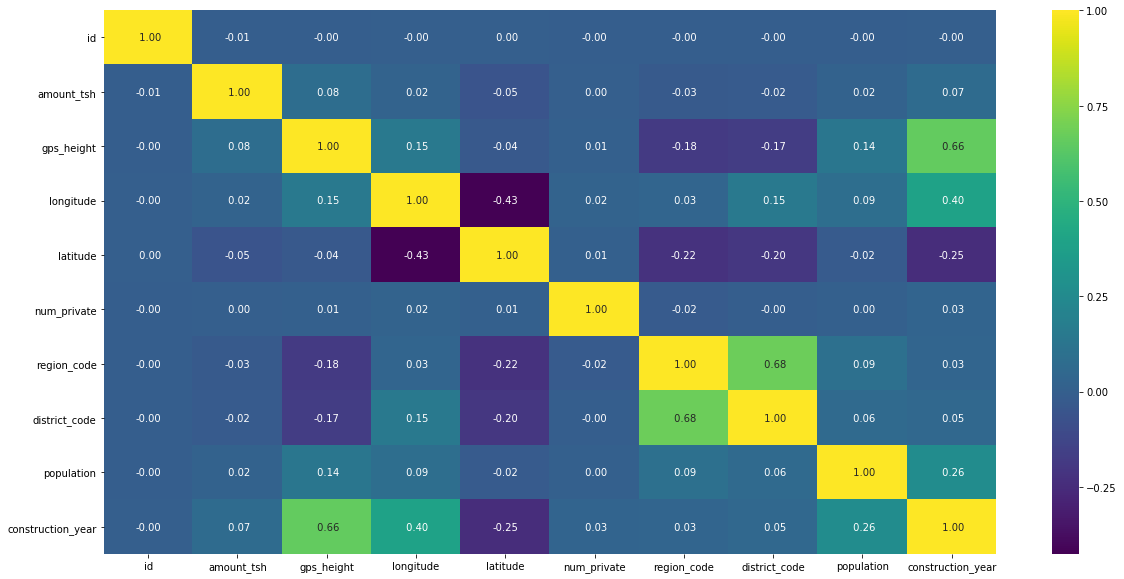

In [188]:
plt.pyplot.figure(figsize=(20,10))
sns.heatmap(train_temp.corr(),cbar=True,fmt =' .2f', annot=True, cmap='viridis')

In [189]:
# def dist_plot(column):
#     ax = ((train_data[train_data.status_type=='functional'].column.value_counts().sort_index()/len(train_data.status_type))*100).plot(kind='bar',color='g', x='column')
#     ((train_data[train_data.status_type=='non functional'].column.value_counts().sort_index()/len(train_data.status_type))*100).plot(kind='bar',color='r', x='column')
#     ((train_data[train_data.status_type=='functional needs repair'].column.value_counts().sort_index()/len(train_data.status_type)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='column')
#     ax.legend(["functional", "non functional","functional needs repair"])
#     plt.pyplot.title('Distribution of waterpoint_type variable ')
#     plt.pyplot.xlabel('column')
#     plt.pyplot.ylabel('Percentage')
#     return plt.pyplot.show()


Text(0, 0.5, 'Percentage')

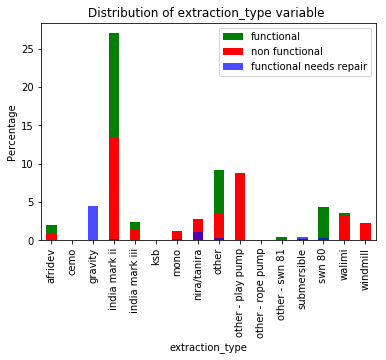

In [190]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].extraction_type.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='extraction_type')
((train_data[train_data.status_group=='non functional'].extraction_type.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='extraction_type')
((train_data[train_data.status_group=='functional needs repair'].extraction_type.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='extraction_type')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of extraction_type variable ')
plt.pyplot.xlabel('extraction_type')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

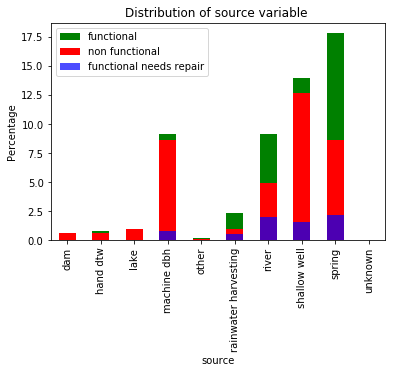

In [191]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].source.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='source')
((train_data[train_data.status_group=='non functional'].source.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='source')
((train_data[train_data.status_group=='functional needs repair'].source.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='source')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of source variable ')
plt.pyplot.xlabel('source')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

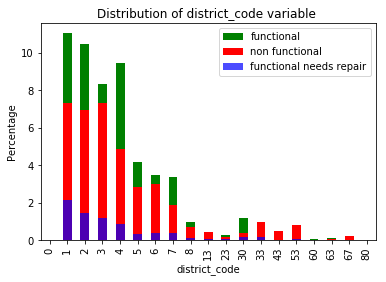

In [192]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].district_code.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='district_code')
((train_data[train_data.status_group=='non functional'].district_code.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='district_code')
((train_data[train_data.status_group=='functional needs repair'].district_code.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='district_code')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of district_code variable ')
plt.pyplot.xlabel('district_code')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

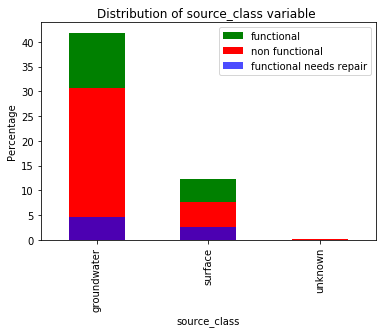

In [193]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].source_class.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='source_class')
((train_data[train_data.status_group=='non functional'].source_class.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='source_class')
((train_data[train_data.status_group=='functional needs repair'].source_class.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='source_class')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of source_class variable ')
plt.pyplot.xlabel('source_class')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

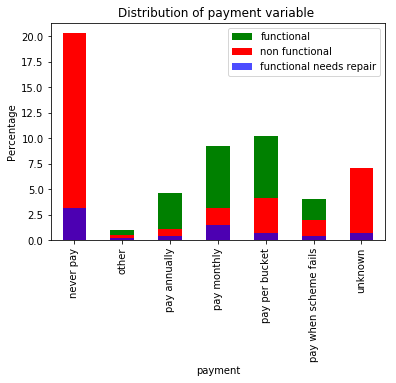

In [194]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].payment.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='payment')
((train_data[train_data.status_group=='non functional'].payment.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='payment')
((train_data[train_data.status_group=='functional needs repair'].payment.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='payment')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of payment variable ')
plt.pyplot.xlabel('payment')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

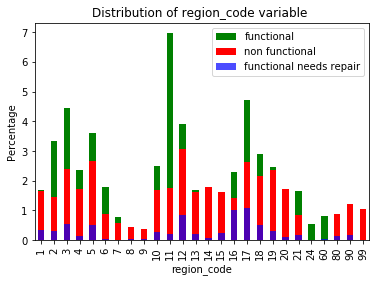

In [195]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].region_code.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='region_code')
((train_data[train_data.status_group=='non functional'].region_code.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='region_code')
((train_data[train_data.status_group=='functional needs repair'].region_code.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='region_code')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of region_code variable ')
plt.pyplot.xlabel('region_code')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

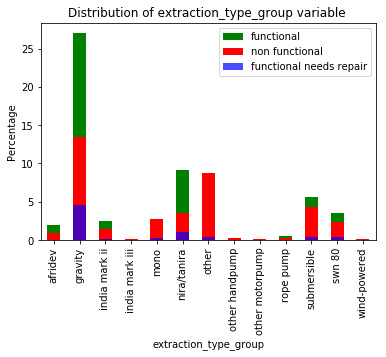

In [196]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].extraction_type_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='extraction_type_group')
((train_data[train_data.status_group=='non functional'].extraction_type_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='extraction_type_group')
((train_data[train_data.status_group=='functional needs repair'].extraction_type_group.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='extraction_type_group')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of extraction_type_group variable ')
plt.pyplot.xlabel('extraction_type_group')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

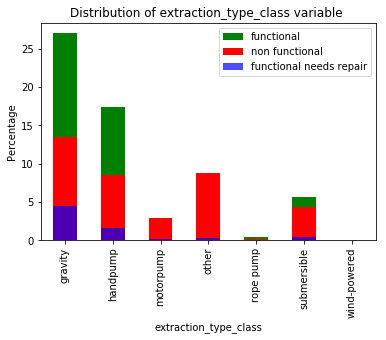

In [197]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].extraction_type_class.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='extraction_type_class')
((train_data[train_data.status_group=='non functional'].extraction_type_class.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='extraction_type_class')
((train_data[train_data.status_group=='functional needs repair'].extraction_type_class.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='extraction_type_class')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of extraction_type_class variable ')
plt.pyplot.xlabel('extraction_type_class')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

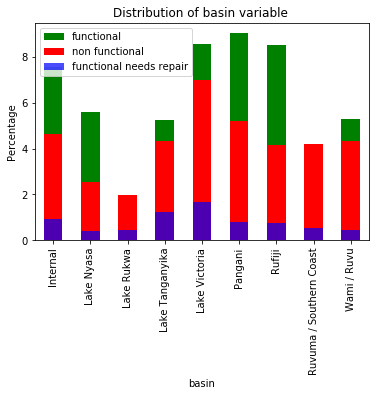

In [198]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].basin.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='basin')
((train_data[train_data.status_group=='non functional'].basin.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='basin')
((train_data[train_data.status_group=='functional needs repair'].basin.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='basin')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of basin variable ')
plt.pyplot.xlabel('basin')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

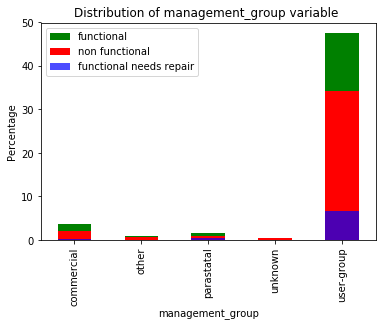

In [199]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].management_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='management_group')
((train_data[train_data.status_group=='non functional'].management_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='management_group')
((train_data[train_data.status_group=='functional needs repair'].management_group.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='management_group')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of management_group variable ')
plt.pyplot.xlabel('management_group')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

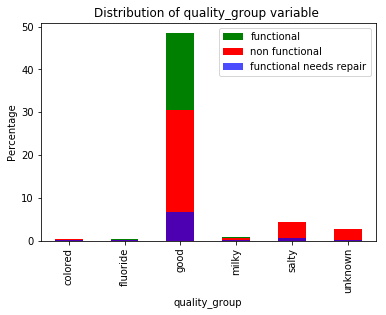

In [200]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].quality_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='quality_group')
((train_data[train_data.status_group=='non functional'].quality_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='quality_group')
((train_data[train_data.status_group=='functional needs repair'].quality_group.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='quality_group')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of quality_group variable ')
plt.pyplot.xlabel('quality_group')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

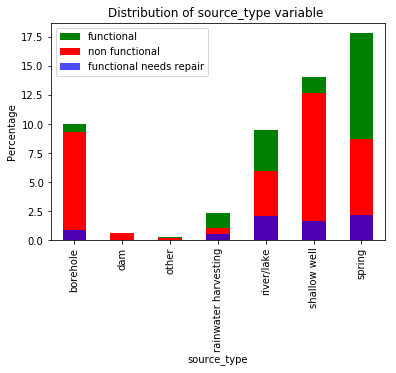

In [201]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].source_type.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='source_type')
((train_data[train_data.status_group=='non functional'].source_type.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='source_type')
((train_data[train_data.status_group=='functional needs repair'].source_type.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='source_type')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of source_type variable ')
plt.pyplot.xlabel('source_type')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

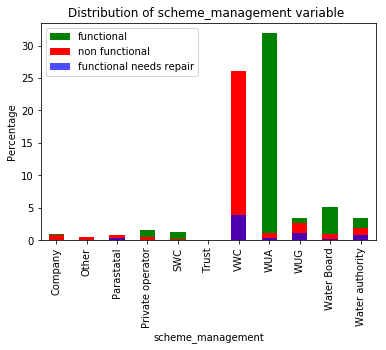

In [202]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].scheme_management.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='scheme_management')
((train_data[train_data.status_group=='non functional'].scheme_management.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='scheme_management')
((train_data[train_data.status_group=='functional needs repair'].scheme_management.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='scheme_management')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of scheme_management variable ')
plt.pyplot.xlabel('scheme_management')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

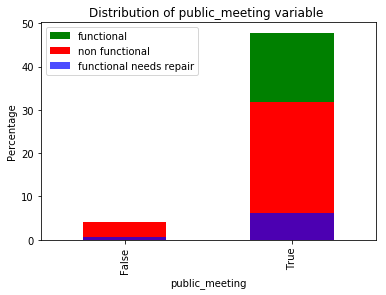

In [203]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].public_meeting.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='public_meeting')
((train_data[train_data.status_group=='non functional'].public_meeting.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='public_meeting')
((train_data[train_data.status_group=='functional needs repair'].public_meeting.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='public_meeting')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of public_meeting variable ')
plt.pyplot.xlabel('public_meeting')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

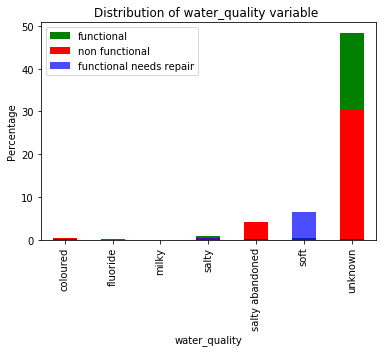

In [204]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].water_quality.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='water_quality')
((train_data[train_data.status_group=='non functional'].water_quality.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='water_quality')
((train_data[train_data.status_group=='functional needs repair'].water_quality.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='water_quality')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of water_quality variable ')
plt.pyplot.xlabel('water_quality')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

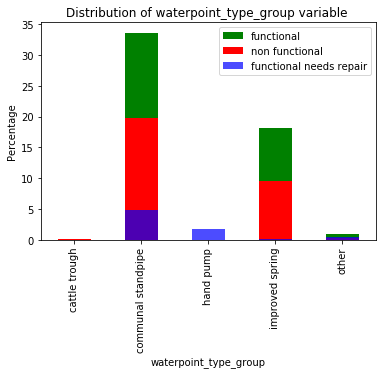

In [205]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].waterpoint_type_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='waterpoint_type_group')
((train_data[train_data.status_group=='non functional'].waterpoint_type_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='waterpoint_type_group')
((train_data[train_data.status_group=='functional needs repair'].waterpoint_type_group.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='waterpoint_type_group')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of waterpoint_type_group variable ')
plt.pyplot.xlabel('waterpoint_type_group')
plt.pyplot.ylabel('Percentage')

In [206]:
plt.pyplot.show()
ax = ((train_data[train_data.status=='functional'].waterpoint_type.value_counts().sort_index()/len(train_data.status))*100).plot(kind='bar',color='g', x='waterpoint_type')
((train_data[train_data.status=='non functional'].waterpoint_type.value_counts().sort_index()/len(train_data.status))*100).plot(kind='bar',color='r', x='waterpoint_type')
((train_data[train_data.status=='functional needs repair'].waterpoint_type.value_counts().sort_index()/len(train_data.status)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='waterpoint_type')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of waterpoint_type variable ')
plt.pyplot.xlabel('waterpoint_type')
plt.pyplot.ylabel('Percentage')

AttributeError: 'DataFrame' object has no attribute 'status'

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].permit.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='permit')
((train_data[train_data.status_group=='non functional'].permit.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='permit')
((train_data[train_data.status_group=='functional needs repair'].permit.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='permit')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of permit variable ')
plt.pyplot.xlabel('permit')
plt.pyplot.ylabel('Percentage')

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].construction_year.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='construction_year')
((train_data[train_data.status_group=='non functional'].construction_year.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='construction_year')
((train_data[train_data.status_group=='functional needs repair'].construction_year.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='construction_year')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of construction_year variable ')
plt.pyplot.xlabel('construction_year')
plt.pyplot.ylabel('Percentage')

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].payment_type.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='payment_type')
((train_data[train_data.status_group=='non functional'].payment_type.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='payment_type')
((train_data[train_data.status_group=='functional needs repair'].payment_type.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='payment_type')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of payment_type variable ')
plt.pyplot.xlabel('payment_type')
plt.pyplot.ylabel('Percentage')

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].quantity.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='quantity')
((train_data[train_data.status_group=='non functional'].quantity.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='quantity')
((train_data[train_data.status_group=='functional needs repair'].quantity.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='quantity')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of quantity variable ')
plt.pyplot.xlabel('quantity')
plt.pyplot.ylabel('Percentage')

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].region.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='region')
((train_data[train_data.status_group=='non functional'].region.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='region')
((train_data[train_data.status_group=='functional needs repair'].region.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='region')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of region variable ')
plt.pyplot.xlabel('region')
plt.pyplot.ylabel('Percentage')

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].quality_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='quality_group')
((train_data[train_data.status_group=='non functional'].quality_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='quality_group')
((train_data[train_data.status_group=='functional needs repair'].quality_group.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='quality_group')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of quality_group variable ')
plt.pyplot.xlabel('quality_group')
plt.pyplot.ylabel('Percentage')

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].management.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='management')
((train_data[train_data.status_group=='non functional'].management.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='management')
((train_data[train_data.status_group=='functional needs repair'].management.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='management')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of management variable ')
plt.pyplot.xlabel('management')
plt.pyplot.ylabel('Percentage')